In [137]:
# importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import re

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from warnings import simplefilter
simplefilter('ignore')

In [138]:
# tensorflow version
tf.__version__

'2.10.0'

In [139]:
# Checking wheather Tensorflow using GPU
len(tf.config.list_physical_devices('GPU'))>0

True

In [140]:
# matplotlib defualts
# plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelsize = 10, labelweight = 'bold', titlesize = 10, titleweight = 'bold', titlepad = 10)

In [141]:
# matplotlib configuration for higher images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [142]:
df = pd.read_csv(r"C:\Users\udayr\train_1.csv")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [143]:
# check for missing values
missing_values = df.isnull().sum()
missing_values

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [144]:
df.shape

(145063, 551)

In [145]:
# total missing values
total_missing_values = missing_values.sum()
total_missing_values

6192931

In [146]:
# total datasets count present in the dataset
total_values = np.product(df.shape)
total_values

79929713

In [147]:
# total percent of missing values
percent = (total_missing_values / total_values) * 100
percent

7.747971020488964

In [148]:
# Data Cleaning with filling the missing values
df = df.fillna(0)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [149]:
# calculating the dataframe
train_data = pd.melt(df, id_vars = ['Page'], var_name = 'Date', value_name = 'Visits')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [150]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


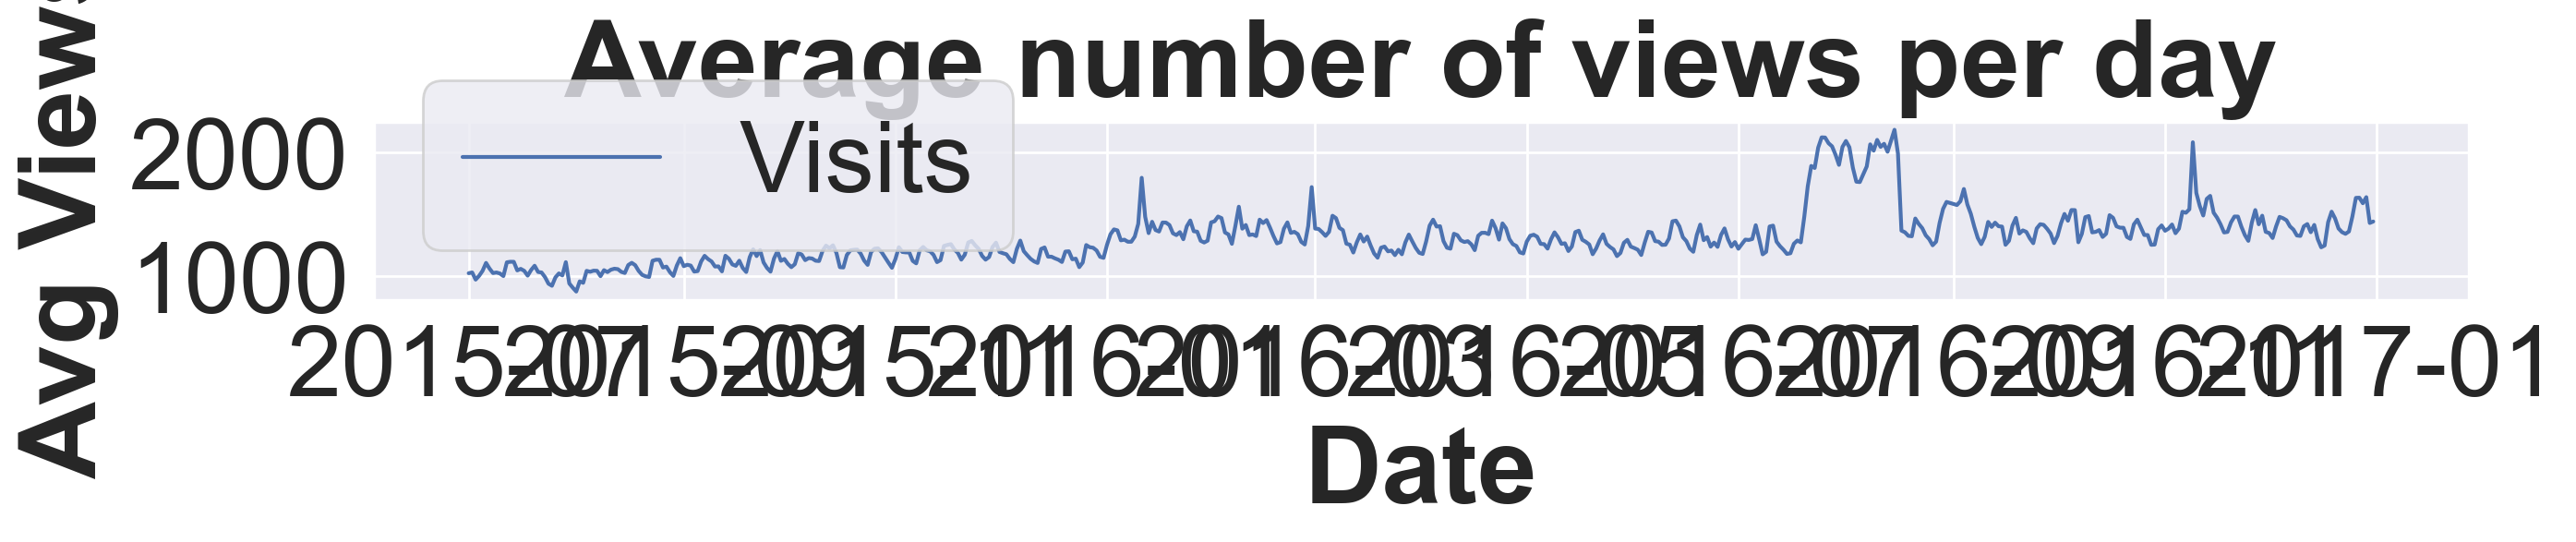

In [176]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].mean()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Average number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

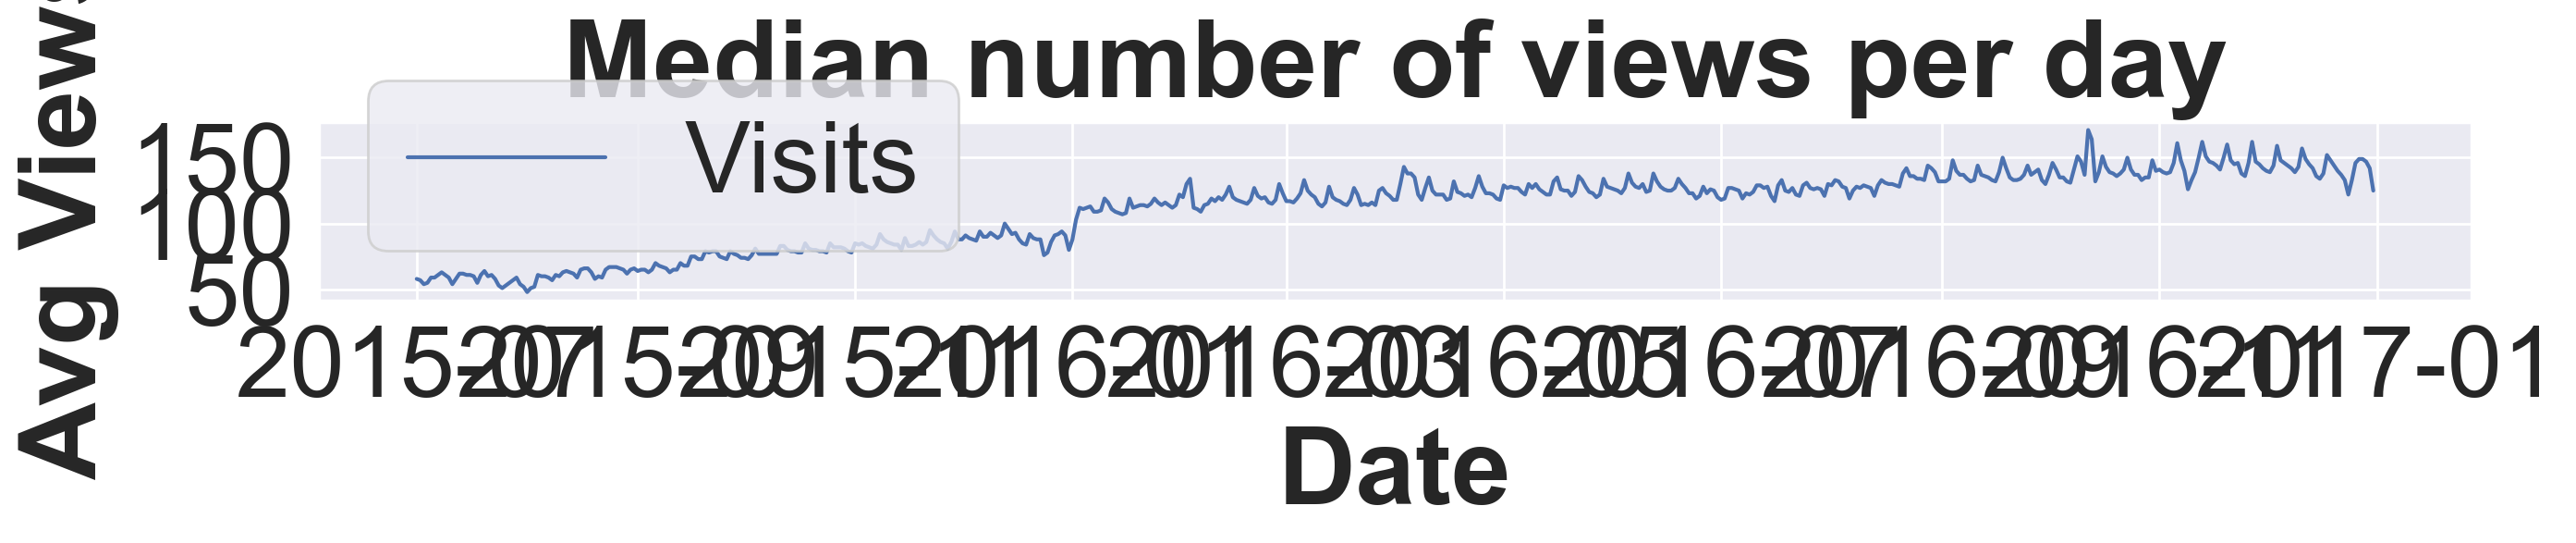

In [177]:
# Data Visualization
temp = train_data.groupby('Date')['Visits'].median()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Median number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

In [166]:
train_data['year'] = train_data.Date.dt.year
train_data['month'] = train_data.Date.dt.month
train_data['day'] = train_data.Date.dt.day

In [167]:
# plotting web traffic over the days of month using headmap
train_data['month_num'] = train_data['month']
train_data['month'].replace('9','9 - September',inplace = True)
train_data['month'].replace('9','9 - October',inplace = True)
train_data['month'].replace('9','9 - November',inplace = True)
train_data['month'].replace('9','9 - December',inplace = True)

In [168]:
train_data.head()

,Page,Date,Visits,year,month,date,month_num,weekday,weekday#,day
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7,03 - Wednesday,2,1
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7,03 - Wednesday,2,1
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7,03 - Wednesday,2,1
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7,03 - Wednesday,2,1
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7,03 - Wednesday,2,1


In [169]:
train_data['weekday'] = train_data['Date'].apply(lambda x: x.weekday())

In [157]:
train_data['weekday#'] = train_data['weekday']
train_data['weekday'].replace(0,'01 - Monday',inplace=True)
train_data['weekday'].replace(1,'02 - Tuesday',inplace=True)
train_data['weekday'].replace(2,'03 - Wednesday',inplace=True)
train_data['weekday'].replace(3,'04 - Thursday',inplace=True)
train_data['weekday'].replace(4,'05 - Friday',inplace=True)
train_data['weekday'].replace(5,'06 - Saturday',inplace=True)
train_data['weekday'].replace(6,'07 - Sunday',inplace=True)

In [158]:
train_data.head()

,Page,Date,Visits,year,month,date,month_num,weekday,weekday#
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,2015,7,1,7,03 - Wednesday,2
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,2015,7,1,7,03 - Wednesday,2
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,2015,7,1,7,03 - Wednesday,2
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,2015,7,1,7,03 - Wednesday,2
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,2015,7,1,7,03 - Wednesday,2


In [159]:
train_group = train_data.groupby(["month", "weekday"])['Visits'].mean().reset_index()
train_group = train_group.pivot(index='weekday', columns='month',values='Visits')
train_group.sort_index(inplace=True)

In [160]:
sns.set(font_scale=3.5) 
f, ax = plt.subplots(figsize=(60, 40))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic of various months(9-12) across weekdays')
plt.show()

In [170]:
cols_to_drop = ['year','month','day','month_num','weekday','weekday','weekday#']
train_data.drop(cols_to_drop,axis=1,inplace=True)
train_data

,Page,Date,Visits,date
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0,1
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0,1
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0,1
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0,1
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0,1
...,...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0,31
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0,31
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0,31
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0,31


In [171]:
# top 10 pages with maximum number of view
top_pages = train_data.groupby('Page')['Visits'].sum().reset_index()
top_pages_list = top_pages.nlargest(10, 'Visits')['Page'].tolist()

In [172]:
top10_pages_df = train_data[train_data['Page'].isin(top_pages_list)]
top10_pages_df.head(10)

,Page,Date,Visits,date
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0,1
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,2015-07-01,1628266.0,1
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,2015-07-01,1620421.0,1
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0,1
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0,1
74114,Main_Page_en.wikipedia.org_mobile-web_all-agents,2015-07-01,8039732.0,1
92205,Wikipedia:Portada_es.wikipedia.org_all-access_...,2015-07-01,1764612.0,1
99322,Заглавная_страница_ru.wikipedia.org_all-access...,2015-07-01,1453303.0,1
116196,Wikipedia:Hauptseite_de.wikipedia.org_mobile-w...,2015-07-01,2038711.0,1
139119,Wikipedia:Hauptseite_de.wikipedia.org_all-acce...,2015-07-01,2983623.0,1


In [173]:
#detecting language across page
def detect_language(page):
    text = page.split('.wikipedia')
    if re.search('[a-z][a-z]',text[0][-2:]):
        return text[0][-2:]
    else: 
        return 'none'

In [174]:
temp1 = train_data
temp1['Wikipedia_page'] = temp1.Page.apply(detect_language)

In [ ]:
fig, ax = plt.subplots(figsize=(45,5))
anomaly_df = top_page_df.loc[top_page_df['anomaly'] == -1].copy()
ax.plot(top_page_df.index,top_page_df['Visits'],color='blue', label = 'Normal')
plt.scatter(anomaly_df.index,anomaly_df['Visits'],color='red',s=100,label = 'Anomaly')
plt.legend()
plt.show()